In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [6]:
data = pd.read_csv("House Price Prediction.csv")
data

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [7]:
data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [8]:
data.tail()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119
1999,2000,2989,5,1,3,1903,Suburban,Fair,No,482525


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [10]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [11]:
data.isna().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [12]:
data.index

RangeIndex(start=0, stop=2000, step=1)

In [13]:
data.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [14]:
data.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [15]:
data["Bedrooms"].var()

np.float64(2.0295025012506254)

In [16]:
data["Bedrooms"].mode()

0    1
Name: Bedrooms, dtype: int64

In [17]:
data["Bedrooms"].median()

np.float64(3.0)

In [18]:
data.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

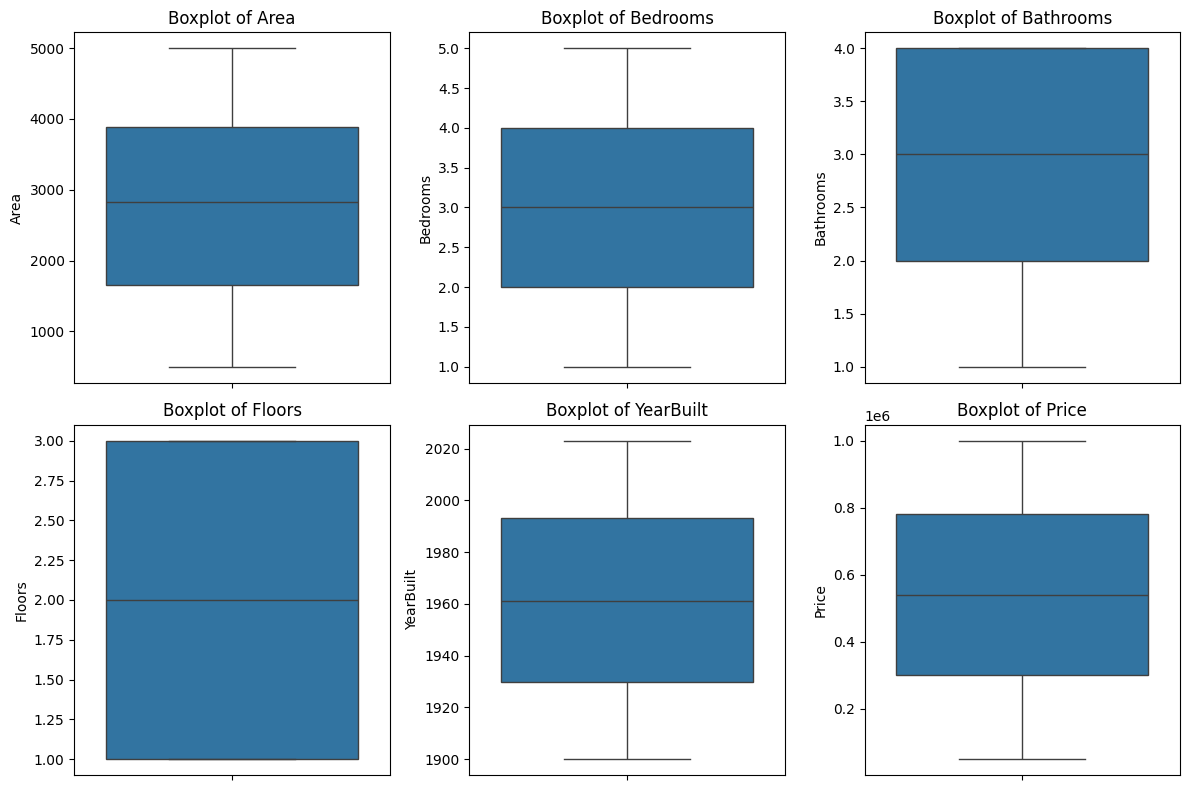

In [22]:
# a = ["Area", "Bedrooms", "Bathrooms", "Floors", "YearBuilt", "Price", ]
# for i, x in enumerate(a):
#     plt.figure(figsize = (12,8))
#     sns.boxplot(data =data, x =x)
#     plt.subplot(2,3, i+1)
#     plt.title(f"Boxplot of {a}")
# # plt.tight_layout()
# plt.show()

numerical_columns = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=data, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

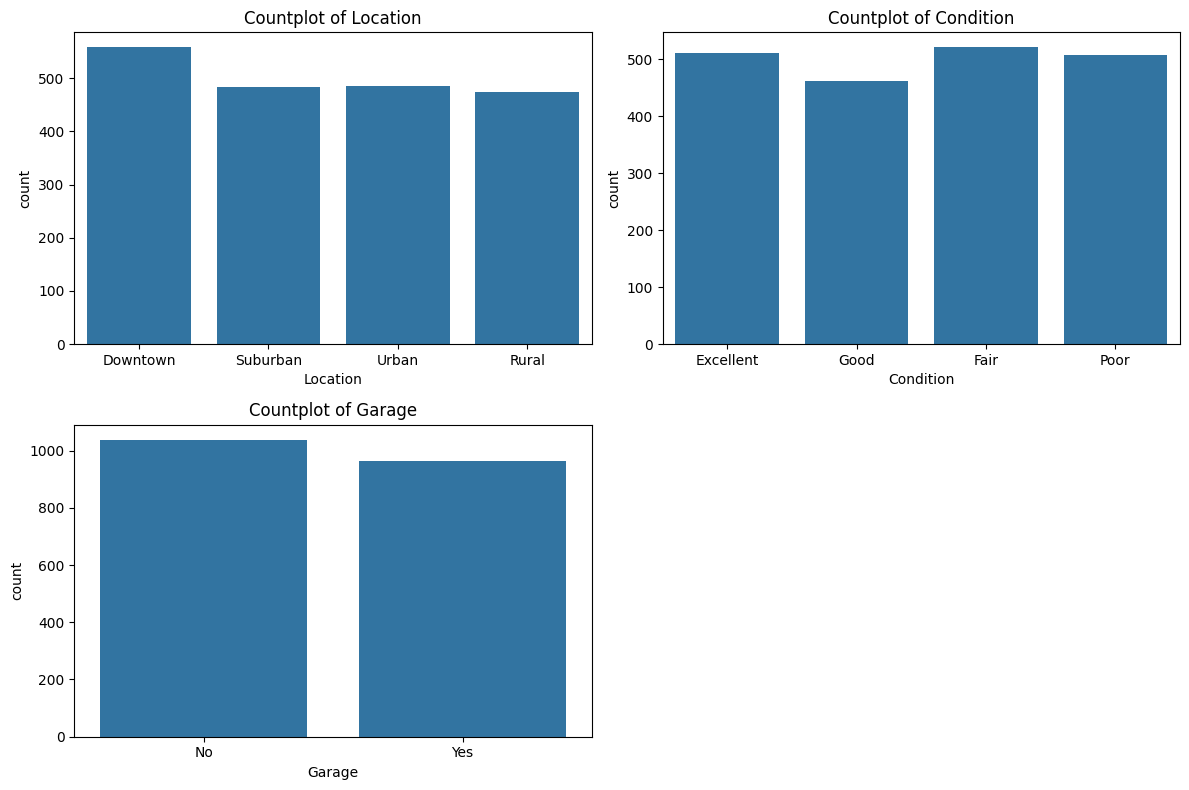

In [24]:
categorical_data = ["Location", "Condition", "Garage"]
plt.figure(figsize = (12,8))
for i, x in enumerate (categorical_data):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=data, x=x)
    plt.title(f'Countplot of {x}')
plt.tight_layout()
plt.show()


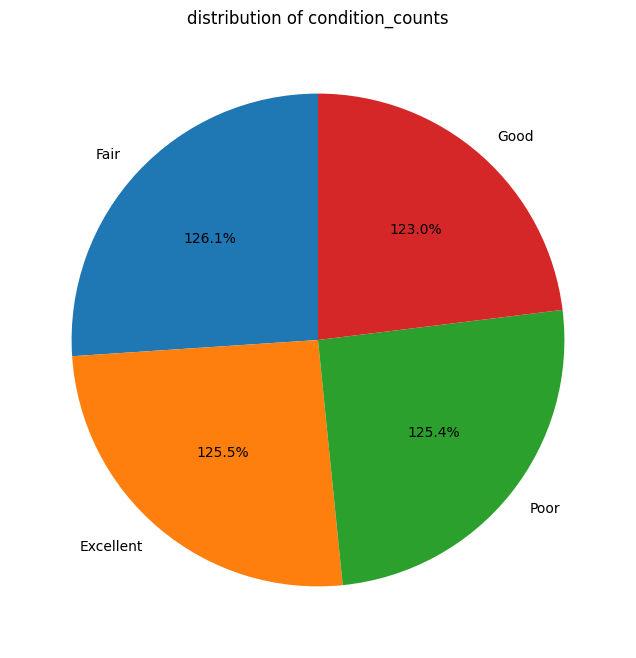

In [25]:
condition_counts = data["Condition"].value_counts()
plt.figure(figsize=(12,8))
plt.pie(condition_counts, labels = condition_counts.index, autopct = "1%.1f%%", startangle = 90)
plt.title("distribution of condition_counts")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_6672\2786598811.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = decade_counts, x = "Decade", y = "Id", palette = "Blues_d" )


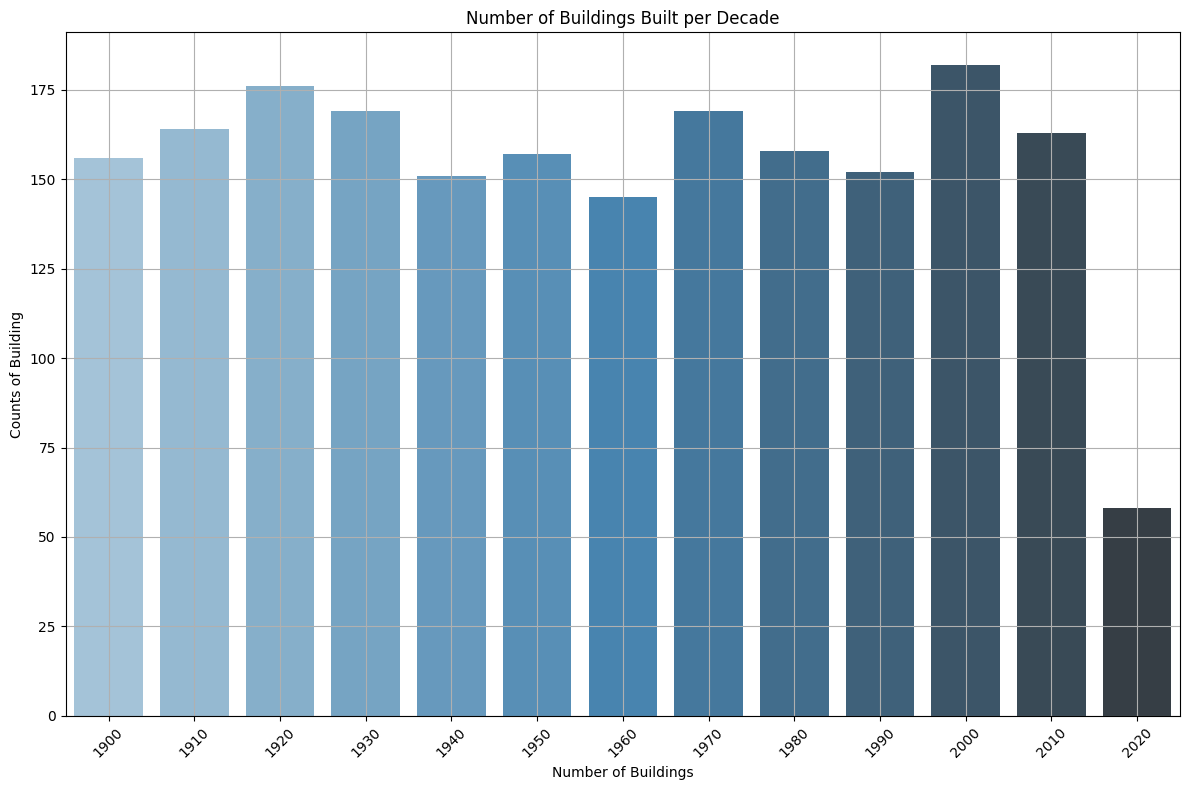

In [25]:
data["Decade"] = (data["YearBuilt"]//10)*10
decade_counts= data.groupby("Decade")["Id"].count().reset_index()
plt.figure(figsize = (12,8))
sns.barplot(data = decade_counts, x = "Decade", y = "Id", palette = "Blues_d" )
plt.title("Number of Buildings Built per Decade")
plt.xlabel ("Number of Buildings")
plt.ylabel ("Counts of Building")
plt.xticks(rotation =45)
plt.grid()
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_6672\1663090581.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data, x = "Condition", y= "Price", palette = "Blues_d")


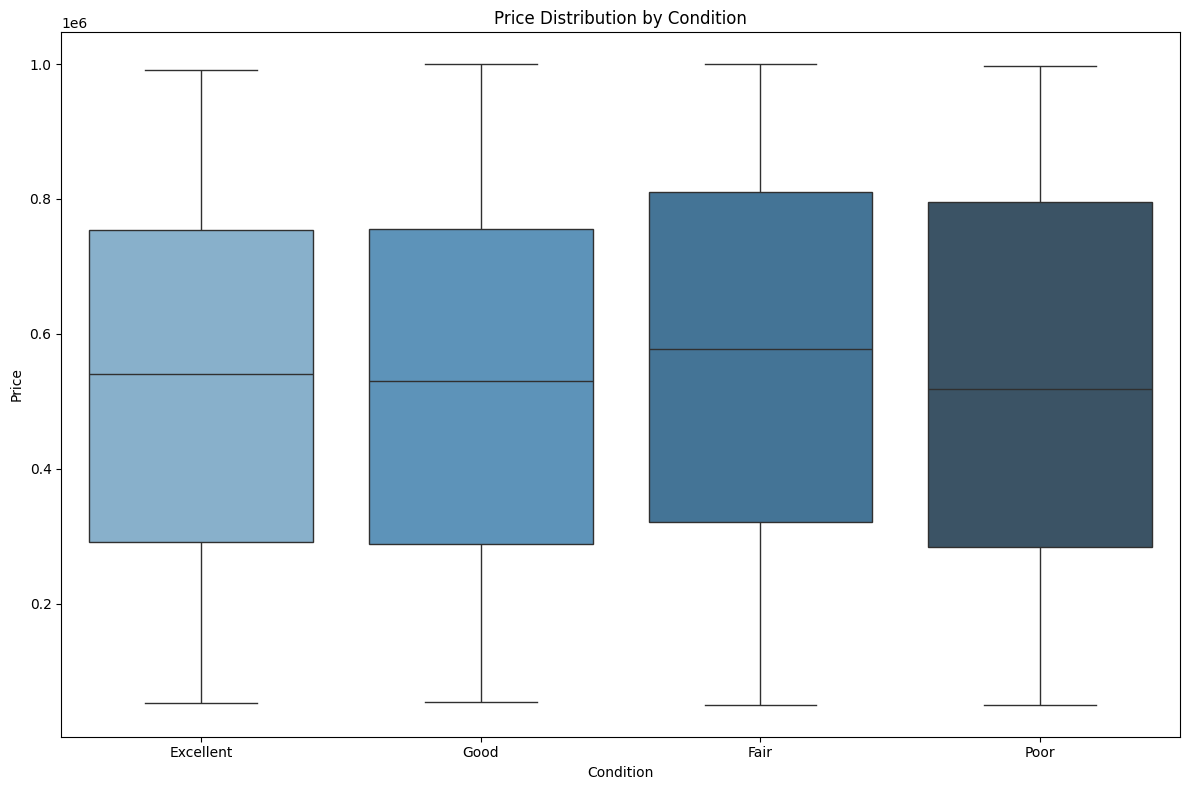

In [26]:
plt.figure(figsize = (12,8))
sns.boxplot(data = data, x = "Condition", y= "Price", palette = "Blues_d")
plt.title("Price Distribution by Condition")
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_6672\4162749664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data, x ="Garage", y = "Price", palette = "Blues_d")


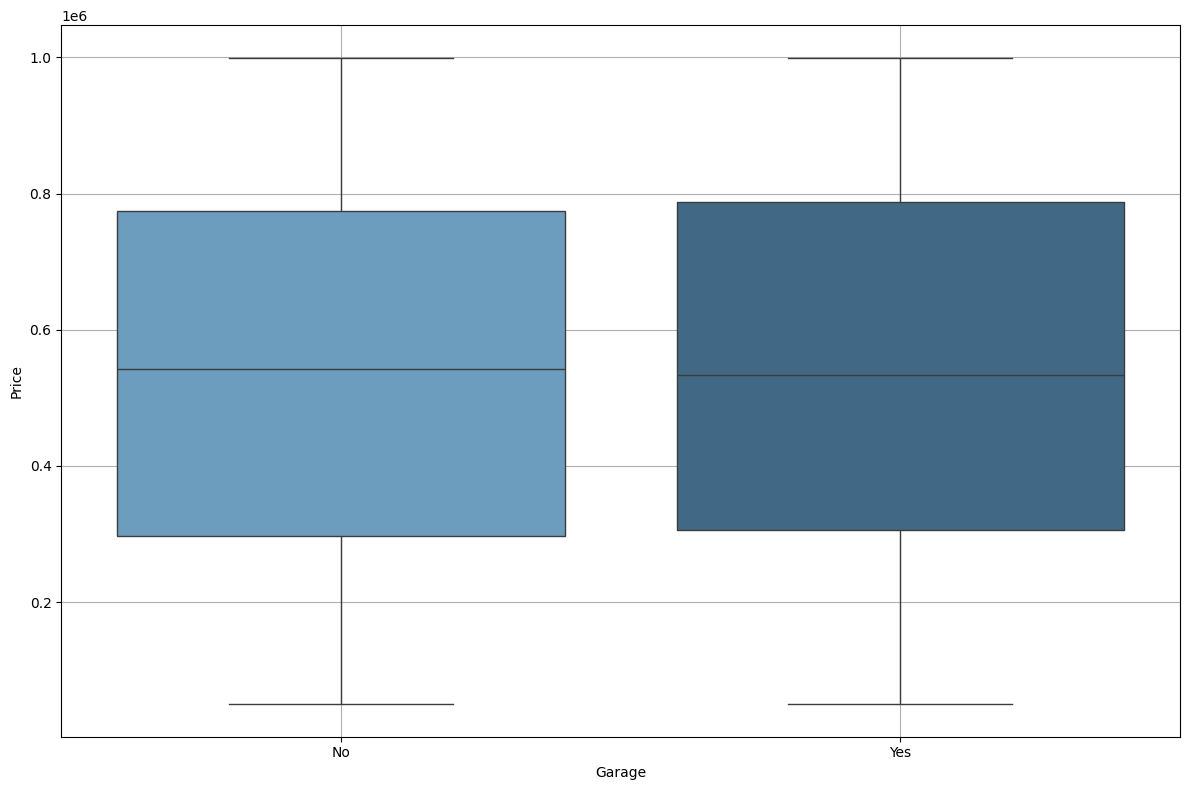

In [27]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = data, x ="Garage", y = "Price", palette = "Blues_d")
plt.tight_layout()
plt.grid()
plt.show()

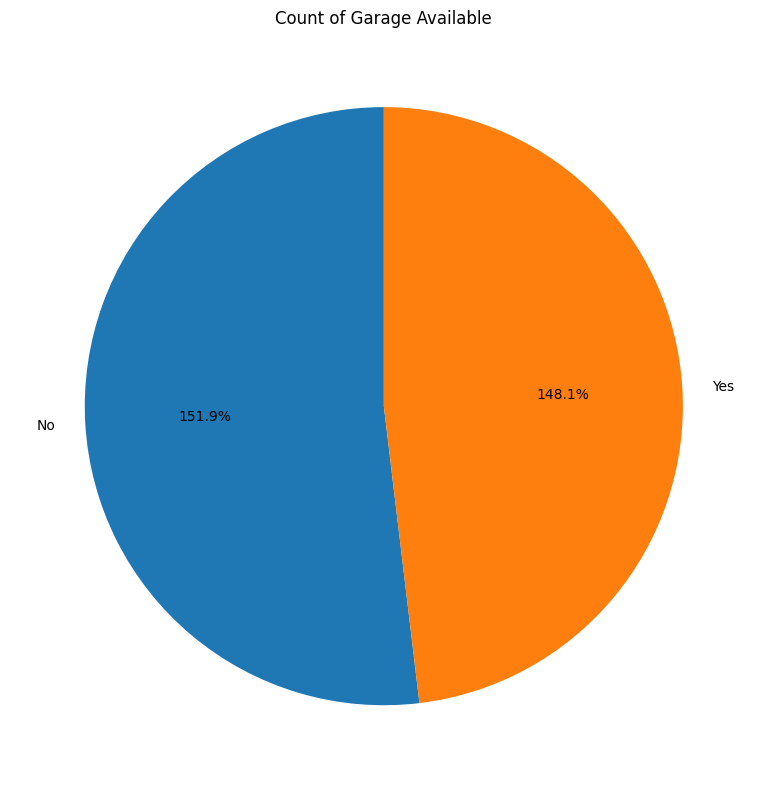

In [28]:
Garage_count = data["Garage"].value_counts()
plt.figure(figsize = (12, 8))
plt.pie(Garage_count, labels = Garage_count.index, autopct = "1%.1f%%", startangle = 90)
plt.title("Count of Garage Available")
plt.tight_layout()
plt.grid()
plt.show()

In [29]:
data.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price', 'Decade'],
      dtype='object')

In [31]:
data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Decade
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919,1970
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998,1950
2,3,3592,2,2,3,1938,Downtown,Good,No,266746,1930
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020,1900
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056,1970


In [32]:
data["Location"].unique()

array(['Downtown', 'Suburban', 'Urban', 'Rural'], dtype=object)

In [33]:
data["Location"].value_counts()

Location
Downtown    558
Urban       485
Suburban    483
Rural       474
Name: count, dtype: int64

In [34]:
data["Location"] = data["Location"].replace(["Downtown", "Suburban", "Urban", "Rural"], [0,1,2,3])

C:\Users\USER\AppData\Local\Temp\ipykernel_6672\1871814300.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Location"] = data["Location"].replace(["Downtown", "Suburban", "Urban", "Rural"], [0,1,2,3])


In [35]:
data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Decade
0,1,1360,5,4,3,1970,0,Excellent,No,149919,1970
1,2,4272,5,4,3,1958,0,Excellent,No,424998,1950
2,3,3592,2,2,3,1938,0,Good,No,266746,1930
3,4,966,4,2,2,1902,1,Fair,Yes,244020,1900
4,5,4926,1,4,2,1975,0,Fair,Yes,636056,1970


In [36]:
data["Condition"].value_counts()

Condition
Fair         521
Excellent    511
Poor         507
Good         461
Name: count, dtype: int64

In [37]:
data["Condition"] = data["Condition"].replace(["Fair", "Excellent", "Poor","Good"],[0,1,2,3])

C:\Users\USER\AppData\Local\Temp\ipykernel_6672\2953283964.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Condition"] = data["Condition"].replace(["Fair", "Excellent", "Poor","Good"],[0,1,2,3])


In [38]:
data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Decade
0,1,1360,5,4,3,1970,0,1,No,149919,1970
1,2,4272,5,4,3,1958,0,1,No,424998,1950
2,3,3592,2,2,3,1938,0,3,No,266746,1930
3,4,966,4,2,2,1902,1,0,Yes,244020,1900
4,5,4926,1,4,2,1975,0,0,Yes,636056,1970


In [39]:
data["Garage"].value_counts()

Garage
No     1038
Yes     962
Name: count, dtype: int64

In [40]:
data["Garage"] = data["Garage"].replace(["No", "Yes"], [0,1])

C:\Users\USER\AppData\Local\Temp\ipykernel_6672\478739977.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Garage"] = data["Garage"].replace(["No", "Yes"], [0,1])


In [41]:
data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Decade
0,1,1360,5,4,3,1970,0,1,0,149919,1970
1,2,4272,5,4,3,1958,0,1,0,424998,1950
2,3,3592,2,2,3,1938,0,3,0,266746,1930
3,4,966,4,2,2,1902,1,0,1,244020,1900
4,5,4926,1,4,2,1975,0,0,1,636056,1970


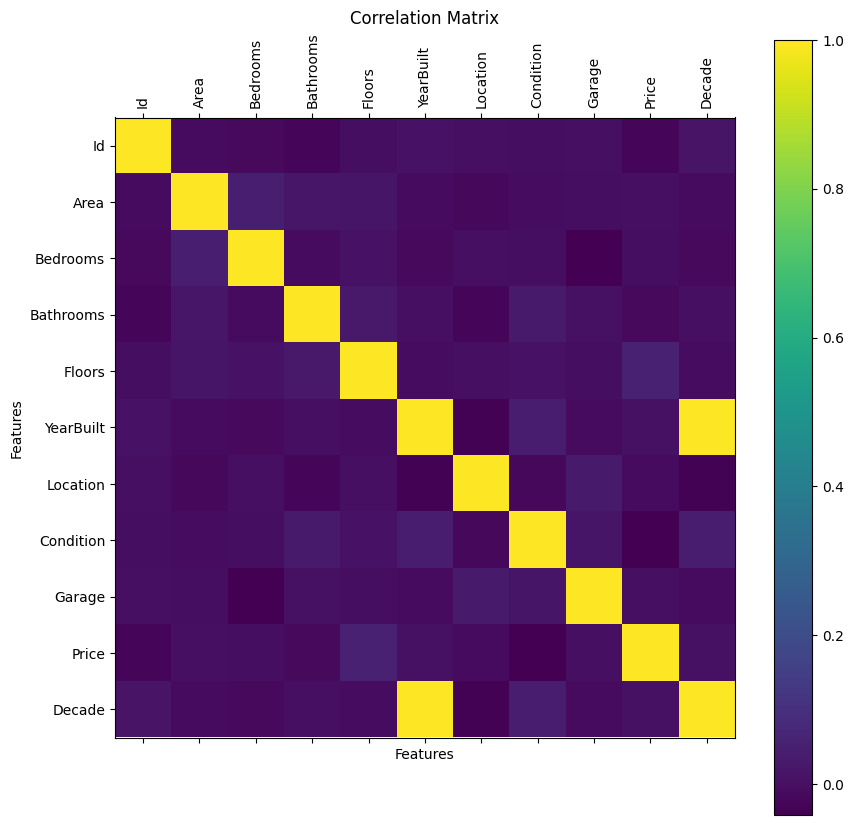

In [42]:
from pylab import rcParams
import warnings
# Set the figure size
plt.rcParams["figure.figsize"] = (20, 10)

# Create the correlation matrix heatmap
plt.matshow(data.corr())

# Set the tick labels
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns, rotation=90)

# Add a colorbar
plt.colorbar()

# Set the title and axis labels
plt.title("Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")

# Show the plot
plt.show()

In [43]:
df_model = data.iloc[:,1:]

In [44]:
df_model

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Decade
0,1360,5,4,3,1970,0,1,0,149919,1970
1,4272,5,4,3,1958,0,1,0,424998,1950
2,3592,2,2,3,1938,0,3,0,266746,1930
3,966,4,2,2,1902,1,0,1,244020,1900
4,4926,1,4,2,1975,0,0,1,636056,1970
...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,1,2,0,295620,1920
1996,3046,5,2,1,2019,1,2,1,580929,2010
1997,1062,5,1,2,1903,3,2,0,476925,1900
1998,4062,3,1,2,1936,2,1,1,161119,1930


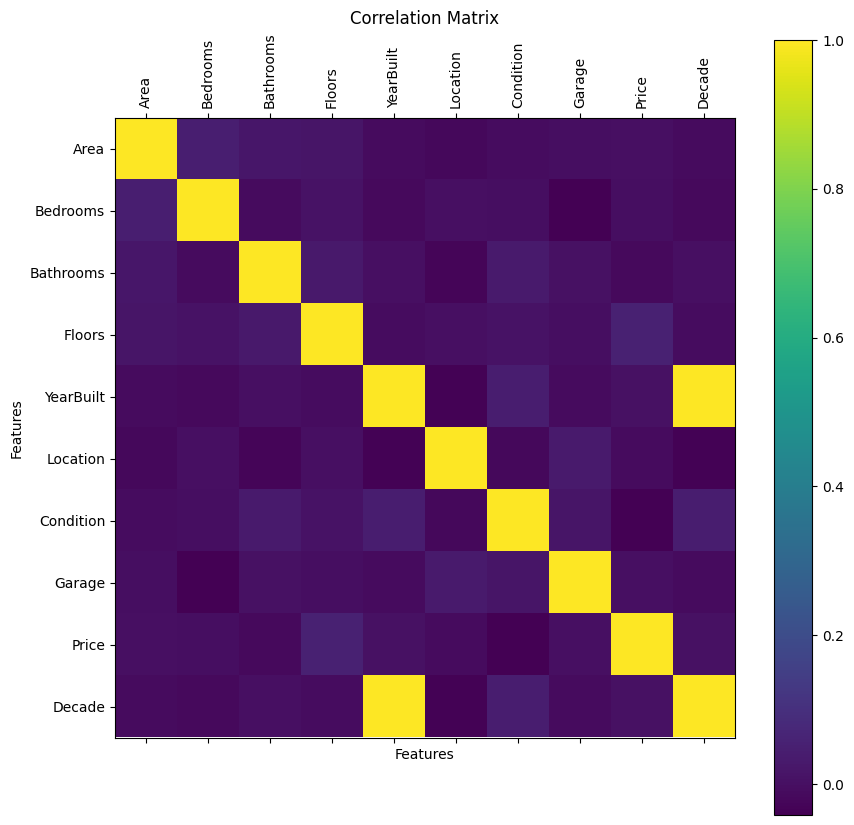

In [70]:
from pylab import rcParams
import warnings
# Set the figure size
plt.rcParams["figure.figsize"] = (20, 10)

# Create the correlation matrix heatmap
plt.matshow(df_model.corr())

# Set the tick labels
plt.yticks(np.arange(df_model.shape[1]), df_model.columns)
plt.xticks(np.arange(df_model.shape[1]), df_model.columns, rotation=90)

# Add a colorbar
plt.colorbar()

# Set the title and axis labels
plt.title("Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")

# Show the plot
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X = data[["Area", "Bedrooms", "Bathrooms", "Floors", "YearBuilt", "Garage", "Location", "Condition", "Decade"]]
y = df_model.drop(columns = ["Price"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.fit_transform(X_test)
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.fit_transform(y_test)
model = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]
models = ["Linear Regression", "Decision Tree", "Random Forest"]
for i, X in enumerate(model):
    train = X.fit(X_train, y_train)
    train_test = X.predict(X_test)
    print("Model for", models[i])
    print("MAE", np.round(mean_absolute_error(y_test, train_test),5),"%")
    print("MSE", np.round(mean_squared_error(y_test, train_test),5),"%")
    print("R2_Score:",np.round(r2_score(y_test, train_test),5),"%")
    print("MSE", np.round(np.sqrt(mean_squared_error(y_test, train_test)), 5),"%")

Model for Linear Regression
MAE 0.0 %
MSE 0.0 %
R2_Score: 1.0 %
MSE 0.0 %
Model for Decision Tree
MAE 0.10862 %
MSE 0.03442 %
R2_Score: 0.69246 %
MSE 0.18552 %
Model for Random Forest
MAE 0.09004 %
MSE 0.01404 %
R2_Score: 0.87656 %
MSE 0.11848 %


In [47]:
best_model = LinearRegression()
best_model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Parameters
n_samples = 1000  # Number of samples
np.random.seed(42)  # For reproducibility

# Coefficients
b0 = 150  # Intercept
b1 = -4   # Coefficient for x1
b2 = 2.5  # Coefficient for x2

# Generate independent variables (x1 and x2)
x1 = np.random.normal(50, 3, n_samples)  # Normal distribution with mean=50, std=3
x2 = np.random.normal(200, 8, n_samples)  # Normal distribution with mean=200, std=8

# Generate error term (noise)
error = np.random.normal(0, 4, n_samples)  # Normal distribution with mean=0, std=4

In [49]:
# Generate dependent variable y based on the linear model
y = b0 + b1 * x1 + b2 * x2 + error

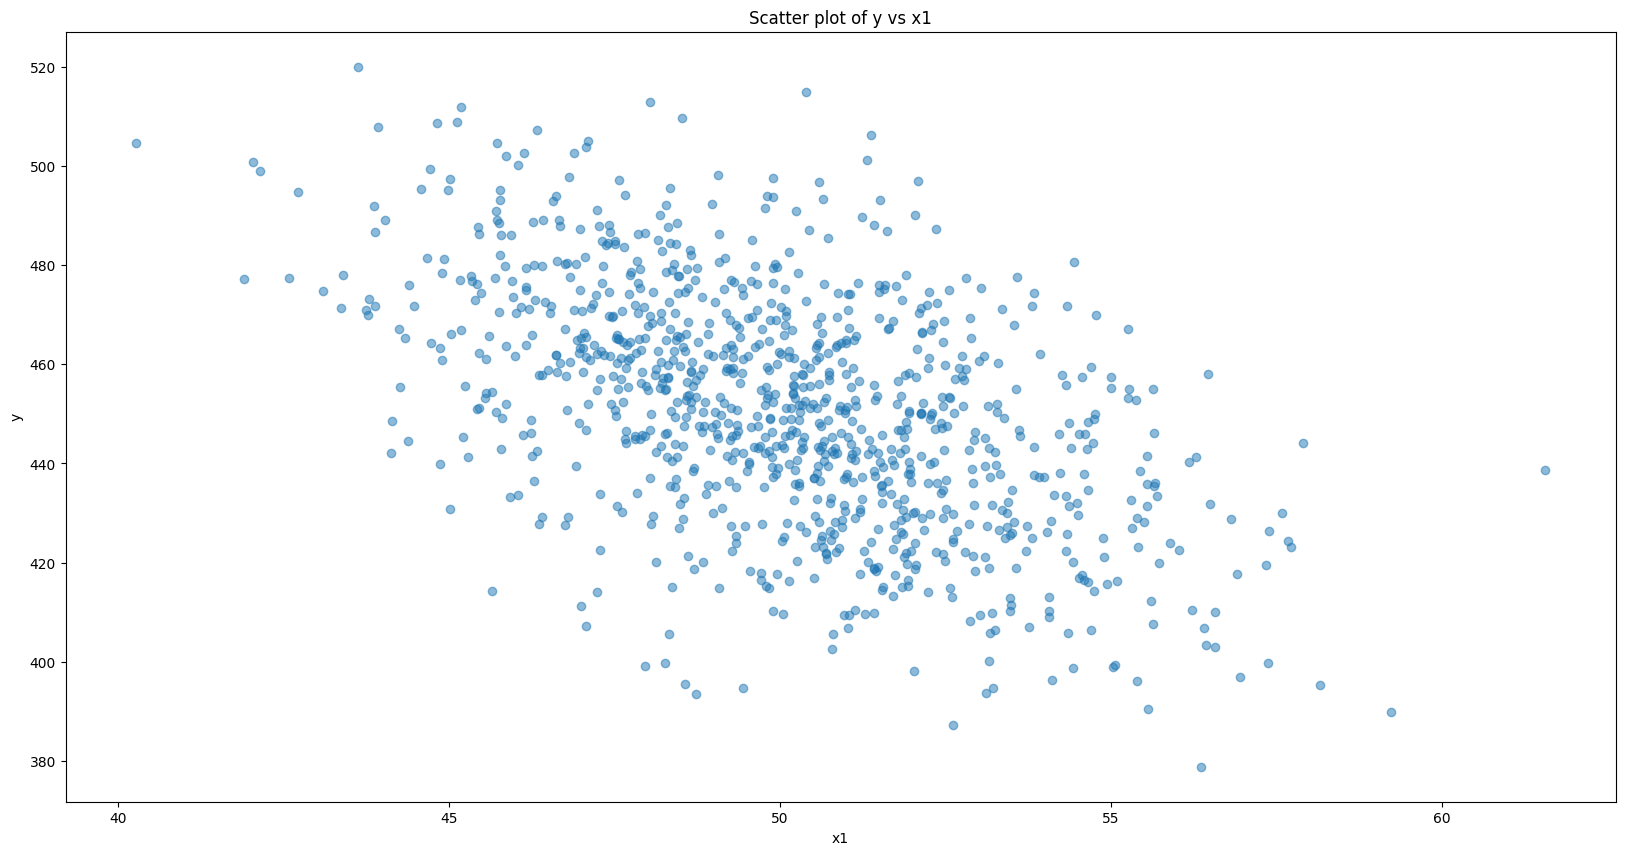

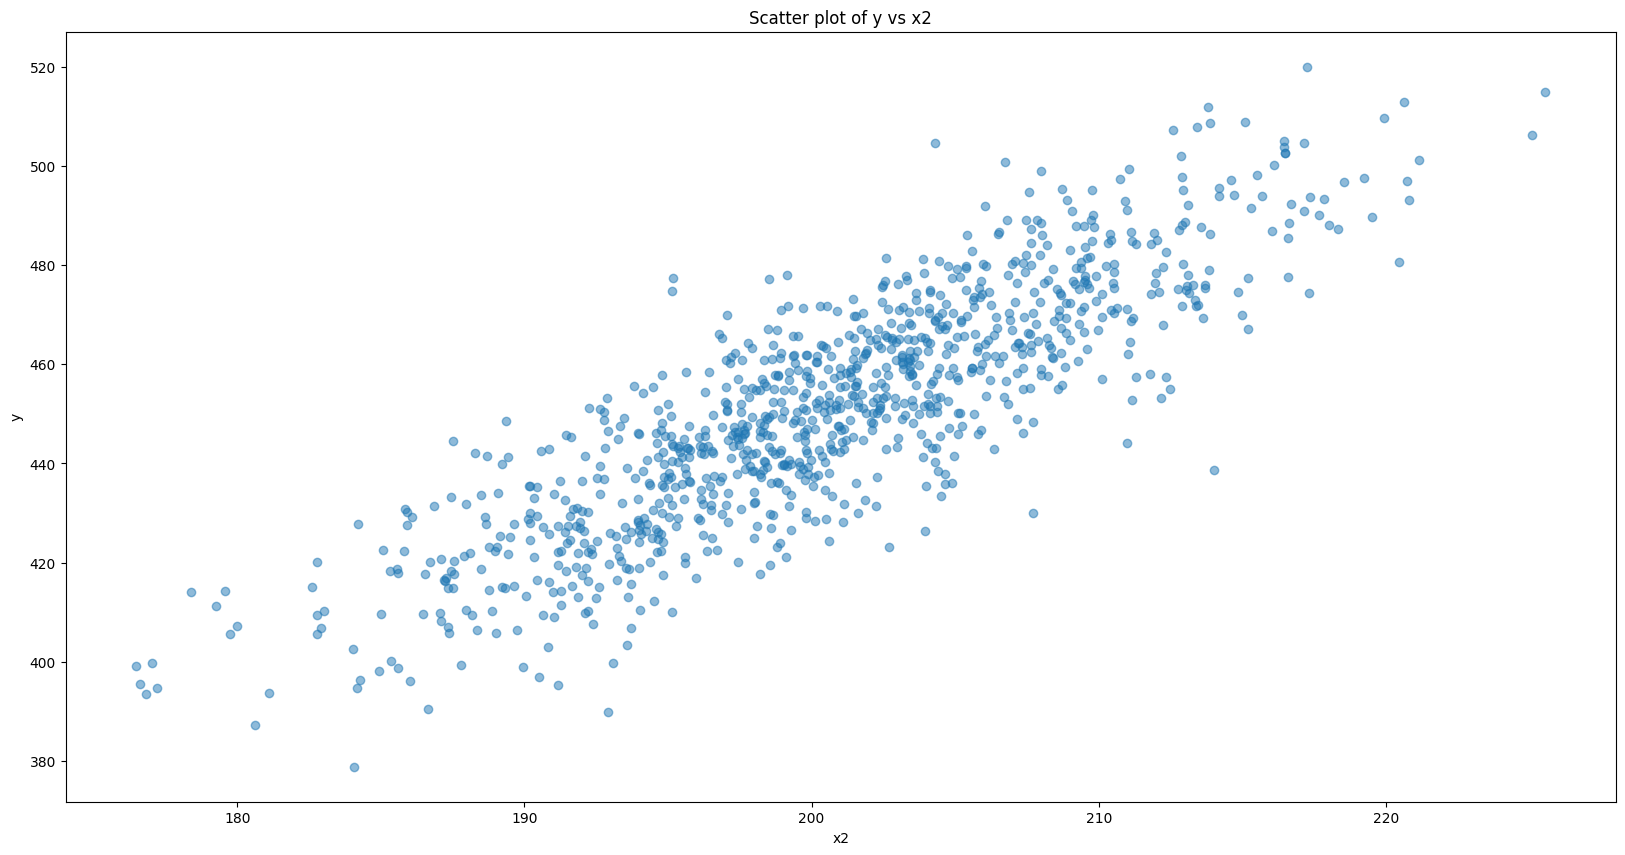

In [50]:
plt.scatter(x1, y, alpha=0.5)
plt.title('Scatter plot of y vs x1')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

plt.scatter(x2, y, alpha=0.5)
plt.title('Scatter plot of y vs x2')
plt.xlabel('x2')
plt.ylabel('y')
plt.show()

Intercept: 149.5885470543983
Coefficients: [-3.97092557  2.49491133]


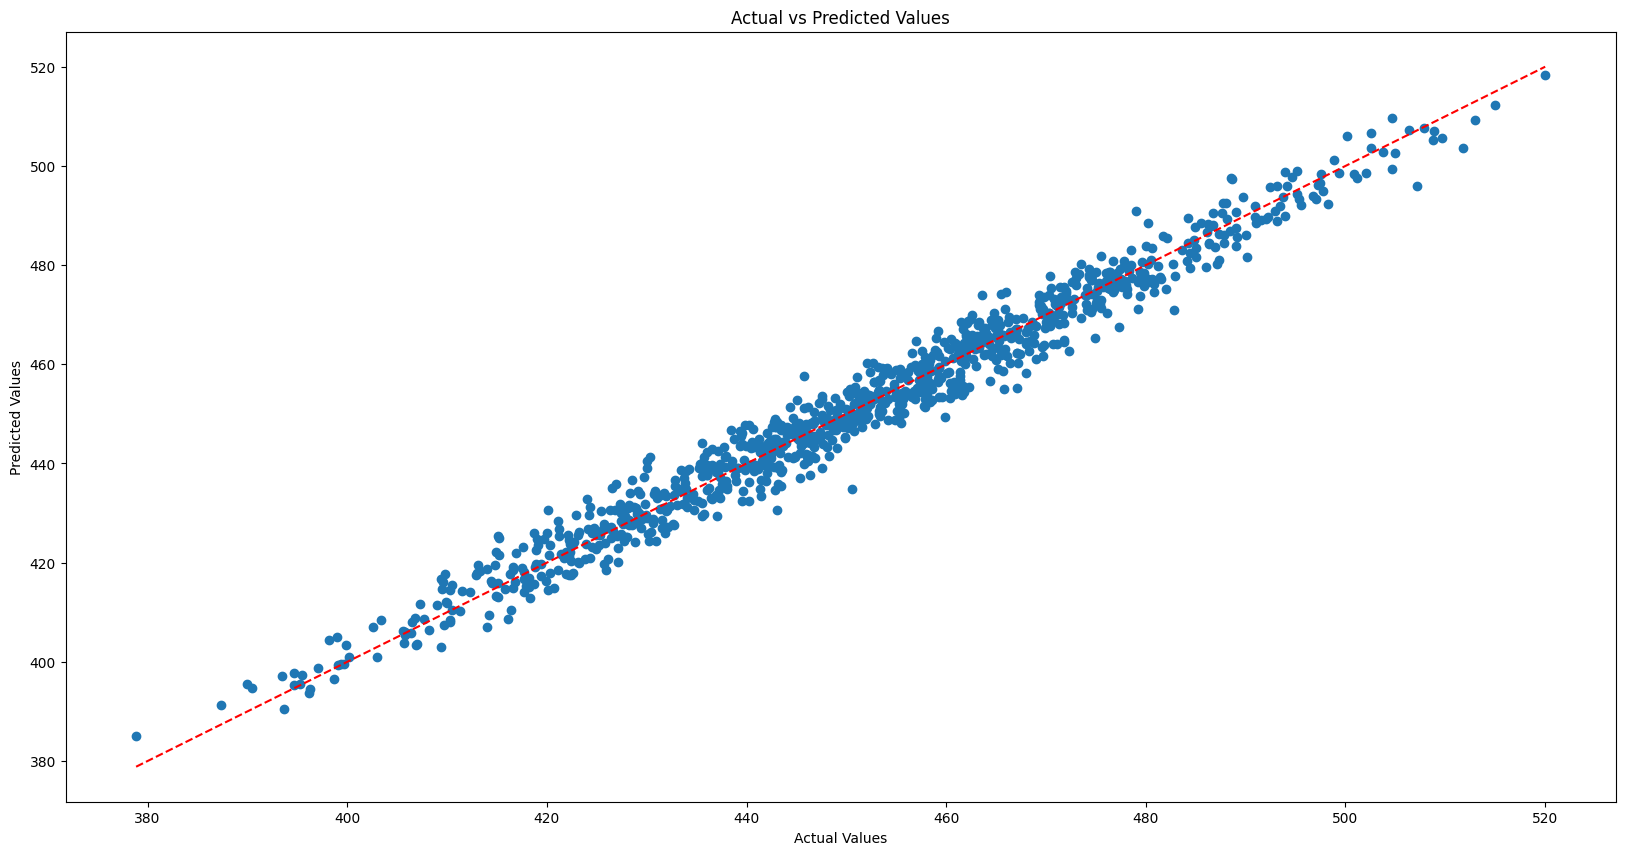

In [51]:
# Reshape data for sklearn
X = np.column_stack((x1, x2))  # Combine x1 and x2 into a single feature matrix

model = LinearRegression()
model.fit(X, y)

print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

# Predict using the model (optional)
predictions = model.predict(X)

# Plotting predictions against actual values
plt.scatter(y, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Diagonal line
plt.show()


In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R² Score: {r2}')

MAE: 3.1397617426350384
MSE: 15.450227480611137
R² Score: 0.9727070093190198


In [56]:

df_model.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Decade
0,1360,5,4,3,1970,0,1,0,149919,1970
1,4272,5,4,3,1958,0,1,0,424998,1950
2,3592,2,2,3,1938,0,3,0,266746,1930
3,966,4,2,2,1902,1,0,1,244020,1900
4,4926,1,4,2,1975,0,0,1,636056,1970


In [ ]:
# Area = int(input("Enter the Area of your house "))
Bedrooms = int(input("Enter the Bedrooms of your house "))
Bathrooms = int(input("Enter the Bathrooms of your house "))
Floors = int(input("Enter the Floors of your house "))
YearBuilt = int(input("Enter the Year that your  house was built "))
Location = int(input("Enter the Location of your house "))
Condition = int(input("Enter the Condition of your house "))
Garage = int(input("Enter the Garage number of your House "))
Decade = int(input("Enter the number of Decade of your House"))
z = np.array([[Area, Bedrooms, Bathrooms, Floors, YearBuilt, Location, Condition, Garage, Decade]])
input_model = X_scaler.transform(z)
prediction = np.round(y_scaler.inverse_transform(best_model.predict(input_model)),2)
print("Final Grade Prediciton: ",min,(prediction,100)[0][0])

Enter the Bedrooms of your house  1360
